In [79]:
import pandas as pd

df = pd.read_csv('../data/2.filtered_annotated/tweet_annotated_fix.csv')
df.head()

,text,label
0,"Sibuk liburan luar negeri, pulang2 bawa omicro...",3
1,"Cegah Omicron, Wapres : tidak boleh ada diapen...",2
2,"@CNNIndonesia Gk tau omicron, gua tau nya unicorn",2
3,"@cybsquad_ itukan tugas mereka, hampir semua a...",3
4,"kalo gini mana bisa kuliah offline, orang omic...",2


In [80]:
import preprocessor as tp

df["text"] = df["text"].apply(tp.clean)
df.head()

,text,label
0,"Sibuk liburan luar negeri, pulang2 bawa omicro...",3
1,"Cegah Omicron, Wapres : tidak boleh ada diapen...",2
2,"Gk tau omicron, gua tau nya unicorn",2
3,"itukan tugas mereka, hampir semua artis itukan...",3
4,"kalo gini mana bisa kuliah offline, orang omic...",2


In [81]:
import re
import string
def text_cleaning(data):
    # remove punc
    data = re.sub(r'[^\w\s]', ' ', data)
    # remove numbers
    data = re.sub('\d+','', data)
    # remove extra whitespace
    data = ' '.join(data.split())
    # remove emoji
    data = re.sub(r'[^\x00-\x7F]+',' ', data)
    # remove new line
    data = re.sub('\n',' ', data)

    return data

df["text_cleaned"] = df["text"].apply(lambda x: text_cleaning(x.lower()))
df.head(10)

,text,label,text_cleaned
0,"Sibuk liburan luar negeri, pulang2 bawa omicro...",3,sibuk liburan luar negeri pulang bawa omicron ...
1,"Cegah Omicron, Wapres : tidak boleh ada diapen...",2,cegah omicron wapres tidak boleh ada diapensas...
2,"Gk tau omicron, gua tau nya unicorn",2,gk tau omicron gua tau nya unicorn
3,"itukan tugas mereka, hampir semua artis itukan...",3,itukan tugas mereka hampir semua artis itukan ...
4,"kalo gini mana bisa kuliah offline, orang omic...",2,kalo gini mana bisa kuliah offline orang omicr...
5,Putik Omicron,3,putik omicron
6,Orang kayak jalan2 ke turki pulang bawa omicro...,2,orang kayak jalan ke turki pulang bawa omicron...
7,"Eh, dengar-dengar ada segerombolan keluarga be...",3,eh dengar dengar ada segerombolan keluarga bes...
8,Si mass asyiappp kesel karna ibu mertuanya di ...,3,si mass asyiappp kesel karna ibu mertuanya di ...
9,"Sebenernya kalau gak pandem, serius aku bakal ...",3,sebenernya kalau gak pandem serius aku bakal b...


In [82]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(data):
    # create stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    # stem
    data = stemmer.stem(data)
    return data

In [83]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def stopword_removal(data):
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    return stopword.remove(data)
stopword_removal(sentence)

'sibuk liburan negeri pulang bawa omicron ppkm indonesia raya'

In [84]:
df["text_removal"] = df["text_cleaned"].apply(lambda x: stopword_removal(stemmer.stem(x)))

In [85]:
df.head(10)

,text,label,text_cleaned,text_removal
0,"Sibuk liburan luar negeri, pulang2 bawa omicro...",3,sibuk liburan luar negeri pulang bawa omicron ...,sibuk libur negeri pulang bawa omicron ppkm in...
1,"Cegah Omicron, Wapres : tidak boleh ada diapen...",2,cegah omicron wapres tidak boleh ada diapensas...,cegah omicron wapres diapensasi karantina
2,"Gk tau omicron, gua tau nya unicorn",2,gk tau omicron gua tau nya unicorn,gk tau omicron gua tau unicorn
3,"itukan tugas mereka, hampir semua artis itukan...",3,itukan tugas mereka hampir semua artis itukan ...,tugas artis influencer rezim jokowi varian del...
4,"kalo gini mana bisa kuliah offline, orang omic...",2,kalo gini mana bisa kuliah offline orang omicr...,kalo gin kuliah offline omicron dah sampe indo
5,Putik Omicron,3,putik omicron,putik omicron
6,Orang kayak jalan2 ke turki pulang bawa omicro...,2,orang kayak jalan ke turki pulang bawa omicron...,kayak jalan turki pulang bawa omicron dampak p...
7,"Eh, dengar-dengar ada segerombolan keluarga be...",3,eh dengar dengar ada segerombolan keluarga bes...,eh dengar dengar gerombol keluarga ngartis syo...
8,Si mass asyiappp kesel karna ibu mertuanya di ...,3,si mass asyiappp kesel karna ibu mertuanya di ...,si mass asyiappp kesel karna mertua tuding net...
9,"Sebenernya kalau gak pandem, serius aku bakal ...",3,sebenernya kalau gak pandem serius aku bakal b...,sebenernya gak pandem serius aja ketrigger ban...


In [86]:
# Kamus alay
kamus_alay_1 = pd.read_csv(
    "https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/kbba.txt",
    delimiter="\t",
    header=None,
    names=['slang', 'formal'])
kamus_alay_2 = pd.read_csv(
    "https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv",
    usecols=["slang", "formal"])

kamus_alay = pd.concat([kamus_alay_1, kamus_alay_2])

In [87]:
# Dictionary bahasa alay
dict_alay = dict()
for index, row in kamus_alay.iterrows():
    dict_alay[row['slang']] = row['formal']

from nltk import word_tokenize
def normalize_text(data):
    word_tokens = word_tokenize(data)
    result = [dict_alay.get(w, w) for w in word_tokens]
    return ' '.join(result)

In [88]:
df["text_normalized"] = df["text_removal"].apply(lambda x: normalize_text(x))
df.head(10)

,text,label,text_cleaned,text_removal,text_normalized
0,"Sibuk liburan luar negeri, pulang2 bawa omicro...",3,sibuk liburan luar negeri pulang bawa omicron ...,sibuk libur negeri pulang bawa omicron ppkm in...,sibuk libur negeri pulang bawa omicron ppkm in...
1,"Cegah Omicron, Wapres : tidak boleh ada diapen...",2,cegah omicron wapres tidak boleh ada diapensas...,cegah omicron wapres diapensasi karantina,cegah omicron wapres diapensasi karantina
2,"Gk tau omicron, gua tau nya unicorn",2,gk tau omicron gua tau nya unicorn,gk tau omicron gua tau unicorn,enggak tahu omicron saya tahu unicorn
3,"itukan tugas mereka, hampir semua artis itukan...",3,itukan tugas mereka hampir semua artis itukan ...,tugas artis influencer rezim jokowi varian del...,tugas artis influencer rezim jokowi varian del...
4,"kalo gini mana bisa kuliah offline, orang omic...",2,kalo gini mana bisa kuliah offline orang omicr...,kalo gin kuliah offline omicron dah sampe indo,kalau gin kuliah offline omicron deh sampai in...
5,Putik Omicron,3,putik omicron,putik omicron,putik omicron
6,Orang kayak jalan2 ke turki pulang bawa omicro...,2,orang kayak jalan ke turki pulang bawa omicron...,kayak jalan turki pulang bawa omicron dampak p...,kayak jalan turki pulang bawa omicron dampak p...
7,"Eh, dengar-dengar ada segerombolan keluarga be...",3,eh dengar dengar ada segerombolan keluarga bes...,eh dengar dengar gerombol keluarga ngartis syo...,eh dengar dengar gerombol keluarga ngartis syo...
8,Si mass asyiappp kesel karna ibu mertuanya di ...,3,si mass asyiappp kesel karna ibu mertuanya di ...,si mass asyiappp kesel karna mertua tuding net...,sih mass asyiappp kesel karena mertua tuding n...
9,"Sebenernya kalau gak pandem, serius aku bakal ...",3,sebenernya kalau gak pandem serius aku bakal b...,sebenernya gak pandem serius aja ketrigger ban...,sebenarnya enggak pandem serius saja ketrigger...


In [89]:
# Re order columns
df_reorder = df[['text', 'text_cleaned', 'text_removal', 'text_normalized', 'label']]
df_reorder.head(10)

,text,text_cleaned,text_removal,text_normalized,label
0,"Sibuk liburan luar negeri, pulang2 bawa omicro...",sibuk liburan luar negeri pulang bawa omicron ...,sibuk libur negeri pulang bawa omicron ppkm in...,sibuk libur negeri pulang bawa omicron ppkm in...,3
1,"Cegah Omicron, Wapres : tidak boleh ada diapen...",cegah omicron wapres tidak boleh ada diapensas...,cegah omicron wapres diapensasi karantina,cegah omicron wapres diapensasi karantina,2
2,"Gk tau omicron, gua tau nya unicorn",gk tau omicron gua tau nya unicorn,gk tau omicron gua tau unicorn,enggak tahu omicron saya tahu unicorn,2
3,"itukan tugas mereka, hampir semua artis itukan...",itukan tugas mereka hampir semua artis itukan ...,tugas artis influencer rezim jokowi varian del...,tugas artis influencer rezim jokowi varian del...,3
4,"kalo gini mana bisa kuliah offline, orang omic...",kalo gini mana bisa kuliah offline orang omicr...,kalo gin kuliah offline omicron dah sampe indo,kalau gin kuliah offline omicron deh sampai in...,2
5,Putik Omicron,putik omicron,putik omicron,putik omicron,3
6,Orang kayak jalan2 ke turki pulang bawa omicro...,orang kayak jalan ke turki pulang bawa omicron...,kayak jalan turki pulang bawa omicron dampak p...,kayak jalan turki pulang bawa omicron dampak p...,2
7,"Eh, dengar-dengar ada segerombolan keluarga be...",eh dengar dengar ada segerombolan keluarga bes...,eh dengar dengar gerombol keluarga ngartis syo...,eh dengar dengar gerombol keluarga ngartis syo...,3
8,Si mass asyiappp kesel karna ibu mertuanya di ...,si mass asyiappp kesel karna ibu mertuanya di ...,si mass asyiappp kesel karna mertua tuding net...,sih mass asyiappp kesel karena mertua tuding n...,3
9,"Sebenernya kalau gak pandem, serius aku bakal ...",sebenernya kalau gak pandem serius aku bakal b...,sebenernya gak pandem serius aja ketrigger ban...,sebenarnya enggak pandem serius saja ketrigger...,3


# Word Cloud

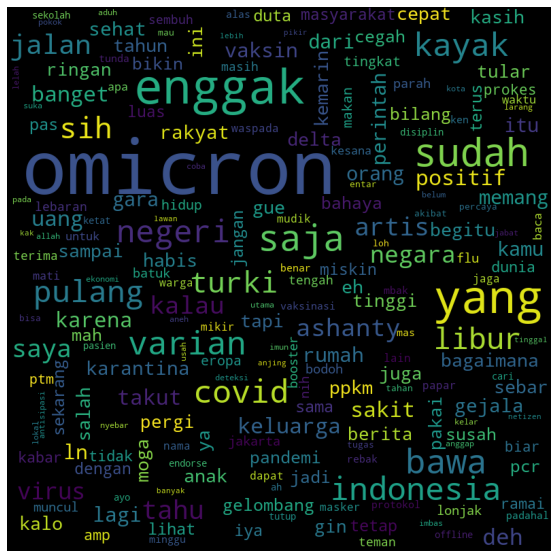

In [90]:
# Make wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_text = " ".join(df_reorder['text_normalized'])
wordcloud = WordCloud(width=800, height=800, max_font_size=110, collocations = False).generate(all_text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [91]:
import seaborn as sns
from collections import Counter
sns.set()
c = Counter(all_text.split())

key = []
val = []

for index in range(100):
    key.append(c.most_common(100)[index][0])
    val.append(c.most_common(100)[index][1])
key, val

(['omicron',
  'enggak',
  'yang',
  'sudah',
  'saja',
  'bawa',
  'varian',
  'kayak',
  'covid',
  'indonesia',
  'negeri',
  'pulang',
  'libur',
  'turki',
  'sih',
  'jalan',
  'tahu',
  'saya',
  'artis',
  'kalau',
  'ashanty',
  'negara',
  'virus',
  'deh',
  'banget',
  'keluarga',
  'sakit',
  'uang',
  'positif',
  'karena',
  'takut',
  'vaksin',
  'lagi',
  'ln',
  'rumah',
  'kamu',
  'orang',
  'perintah',
  'itu',
  'memang',
  'dari',
  'gara',
  'sehat',
  'rakyat',
  'gejala',
  'karantina',
  'ppkm',
  'sebar',
  'sampai',
  'tahun',
  'ya',
  'bagaimana',
  'kalo',
  'ini',
  'tapi',
  'gue',
  'delta',
  'cepat',
  'habis',
  'salah',
  'kasih',
  'eh',
  'kemarin',
  'anak',
  'begitu',
  'moga',
  'pakai',
  'tinggi',
  'gin',
  'who',
  'juga',
  'ringan',
  'tular',
  'pergi',
  'berita',
  'pandemi',
  'gelombang',
  'cegah',
  'jadi',
  'bilang',
  'susah',
  'pcr',
  'bahaya',
  'bikin',
  'mah',
  'pas',
  'sekarang',
  'sama',
  'lihat',
  'jangan',
  '

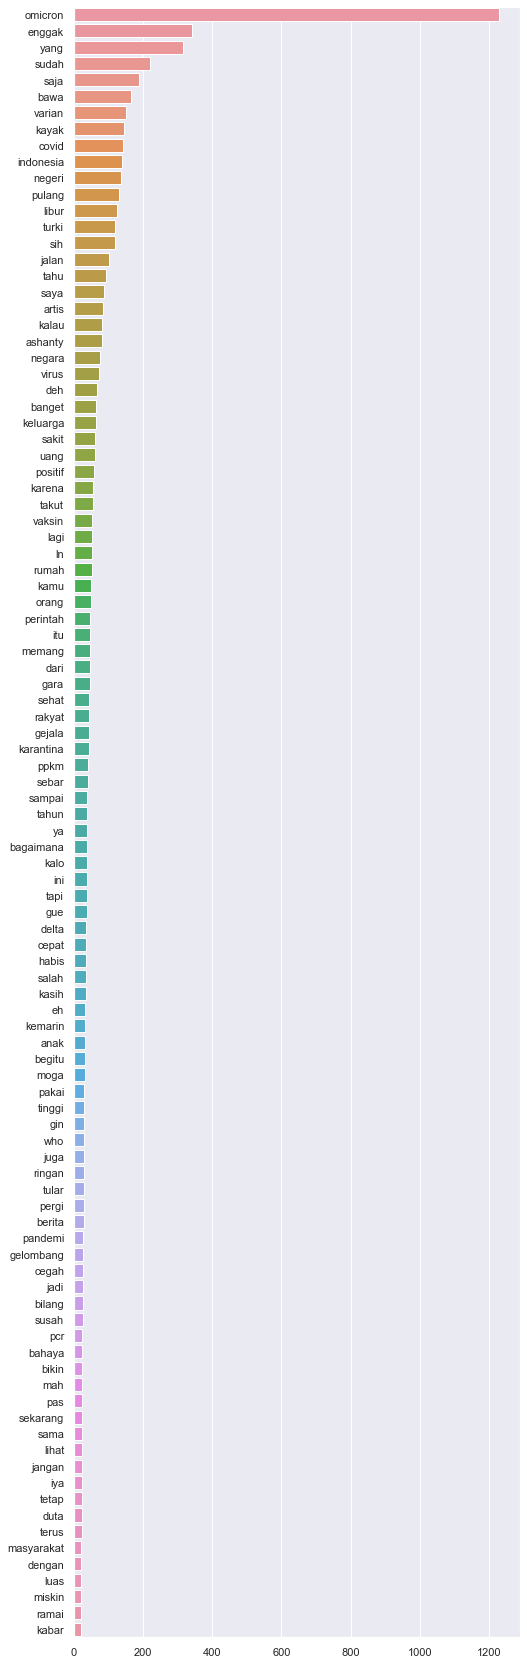

In [92]:
plt.figure(figsize=(8,30))
sns.barplot(x=val, y=key)
plt.show()

gin -> gini
ya -> iya

In [97]:
dict_clean = {"gin" : "gini",
"ya":"iya",
"yaa":"iya",
"gue":"aku",
"saya":"aku",
"moga" : "semoga",
"lo":"kamu",
"gw":"aku",
}
def replace_word(data):
    word_tokens = word_tokenize(data)
    result = [dict_clean.get(w, w) for w in word_tokens]
    return ' '.join(result)

df_reorder.insert(4, "text_manual_replaced", df_reorder["text_normalized"].apply(lambda x: replace_word(x)))
df_reorder.head()

,text,text_cleaned,text_removal,text_normalized,text_manual_replaced,label
0,"Sibuk liburan luar negeri, pulang2 bawa omicro...",sibuk liburan luar negeri pulang bawa omicron ...,sibuk libur negeri pulang bawa omicron ppkm in...,sibuk libur negeri pulang bawa omicron ppkm in...,sibuk libur negeri pulang bawa omicron ppkm in...,3
1,"Cegah Omicron, Wapres : tidak boleh ada diapen...",cegah omicron wapres tidak boleh ada diapensas...,cegah omicron wapres diapensasi karantina,cegah omicron wapres diapensasi karantina,cegah omicron wapres diapensasi karantina,2
2,"Gk tau omicron, gua tau nya unicorn",gk tau omicron gua tau nya unicorn,gk tau omicron gua tau unicorn,enggak tahu omicron saya tahu unicorn,enggak tahu omicron aku tahu unicorn,2
3,"itukan tugas mereka, hampir semua artis itukan...",itukan tugas mereka hampir semua artis itukan ...,tugas artis influencer rezim jokowi varian del...,tugas artis influencer rezim jokowi varian del...,tugas artis influencer rezim jokowi varian del...,3
4,"kalo gini mana bisa kuliah offline, orang omic...",kalo gini mana bisa kuliah offline orang omicr...,kalo gin kuliah offline omicron dah sampe indo,kalau gin kuliah offline omicron deh sampai in...,kalau gini kuliah offline omicron deh sampai i...,2


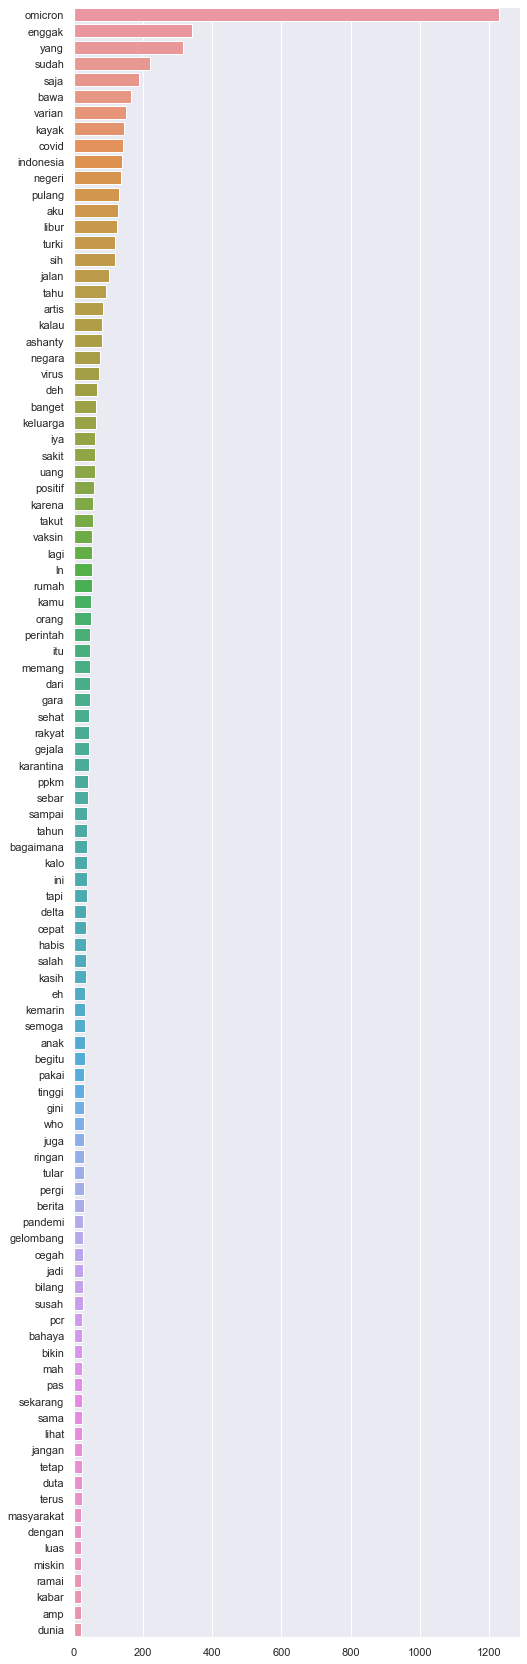

In [98]:
all_text_new = " ".join(df_reorder['text_manual_replaced'])
c = Counter(all_text_new.split())

key = []
val = []

for index in range(100):
    key.append(c.most_common(100)[index][0])
    val.append(c.most_common(100)[index][1])

plt.figure(figsize=(8,30))
sns.barplot(x=val, y=key)
plt.show()

In [101]:
def without_stopword(data):
    data = text_cleaning(data)
    data = normalize_text(data)
    data = stemming(data)
    data = replace_word(data)

    return data

In [102]:
df_reorder.insert(5, "text_without_stopword", df_reorder["text_manual_replaced"].apply(lambda x: without_stopword(x)))
df_reorder.head()

,text,text_cleaned,text_removal,text_normalized,text_manual_replaced,text_without_stopword,label
0,"Sibuk liburan luar negeri, pulang2 bawa omicro...",sibuk liburan luar negeri pulang bawa omicron ...,sibuk libur negeri pulang bawa omicron ppkm in...,sibuk libur negeri pulang bawa omicron ppkm in...,sibuk libur negeri pulang bawa omicron ppkm in...,sibuk libur negeri pulang bawa omicron ppkm in...,3
1,"Cegah Omicron, Wapres : tidak boleh ada diapen...",cegah omicron wapres tidak boleh ada diapensas...,cegah omicron wapres diapensasi karantina,cegah omicron wapres diapensasi karantina,cegah omicron wapres diapensasi karantina,cegah omicron wapres diapensasi karantina,2
2,"Gk tau omicron, gua tau nya unicorn",gk tau omicron gua tau nya unicorn,gk tau omicron gua tau unicorn,enggak tahu omicron saya tahu unicorn,enggak tahu omicron aku tahu unicorn,tidak tahu omicron aku tahu unicorn,2
3,"itukan tugas mereka, hampir semua artis itukan...",itukan tugas mereka hampir semua artis itukan ...,tugas artis influencer rezim jokowi varian del...,tugas artis influencer rezim jokowi varian del...,tugas artis influencer rezim jokowi varian del...,tugas artis influencer rezim jokowi varian del...,3
4,"kalo gini mana bisa kuliah offline, orang omic...",kalo gini mana bisa kuliah offline orang omicr...,kalo gin kuliah offline omicron dah sampe indo,kalau gin kuliah offline omicron deh sampai in...,kalau gini kuliah offline omicron deh sampai i...,kalau begini kuliah offline omicron deh sampai...,2


In [104]:
df_reorder.to_csv('../data/3.preprocessed/tweet_preprocessed.csv', index=False)